# Exercise 3

Exercise 3 includes five problems (+ 1 optional) that you need to solve with **programming**. For each problem you need to modify the notebook by adding your own solutions. Remember to save and commit your changes locally, and push your changes to GitHub regularly! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case anything happen with your computer.
 
An overview of the tasks (total 20 points):

 - Problem 1: get familiar with CSC Noppe cloud computing environment and working with Git (version control)
 - Problem 2: read data into geopandas from different file formats and make maps out of the data
 - Problem 3: geocode addresses from Excel file(s)
 - Problem 4: create a routable network for car
 - Problem 5: conduct shortest path analysis along road network
 - *(Problem 6: Optional: conduct shortest path analysis between multiple locations.)*
 - Problem 7: give us an estimate about how much time you used for doing the exercise and optional feedback about it
 
### Time allocation

Because this is the first time, this exercise is given, we do not yet have an accurate estimate of the workload. However, we estimate that it takes over 10 hours to finish this Exercise. The time it takes can vary significantly from student to student, so we recommended that you start immediately working on the exercise to avoid issues meeting with the deadline.

### Due date

You should submit (push) your Exercise answers to your personal Github repository **by Friday 15th November 23:59**. 
      
### Start your exercise in CSC Noppe

Before you can start programming, you need to launch the CSC Notebook instance and clone your **personal copy of the Exercise repository** (i.e. something like `exercise-3-htenkanen`) there using Git. 

### Working with Jupyter Notebooks

Jupyter Notebooks are documents that can be used and run inside the JupyterLab programming environment (e.g. at [noppe.csc.fi](https://noppe.csc.fi/)) containing the computer code and rich text elements (such as text, figures, tables and links). 

**A couple of hints**:

- You can **execute a cell** by clicking a given cell that you want to run and pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or by clicking the "Play" button on top)
- You can **change the cell-type** between `Markdown` (for writing text) and `Code` (for writing/executing code) from the dropdown menu above. 

See [**further details and help from here**](https://pythongis.org/part1/chapter-01/nb/04-using-jupyterlab.html). 
 
### Hints 

If there are general questions arising from this exercise, we will add hints to the course website under [Exercise 3 description](https://introsda.readthedocs.io/en/latest/exercises/exercise-3.html). 

## Problem 1 - Getting started with CSC Noppe (1 point)

In the first problem this week, your target is to learn how to work with CSC Noppe cloud computing environment. There are four tasks in this problem:

**Task 1.1.** Join the CSC Noppe workspace of the course by [following these materials in Tutorial 0](https://introsda.readthedocs.io/en/develop/tutorials/git-basics.html#join-the-csc-noppe-workspace-of-the-course)

**Task 1.2.** Create a Personal Access Token for Github by [following these materials in Tutorial 0](https://introsda.readthedocs.io/en/develop/tutorials/git-basics.html#create-a-personal-access-token)

**Task 1.3.** Launch a new Noppe session [by following these materials](https://introsda.readthedocs.io/en/develop/tutorials/git-basics.html#start-noppe-computing-instance) that will open a JupyterLab in your browser that you can use for programming

**Task 1.4** Start working on the Exercise 3 in Noppe [by following these materials](https://introsda.readthedocs.io/en/develop/tutorials/git-basics.html#start-working-on-the-exercise). Go through the tutorial carefully that will show you how to make simple change to the Readme.md file and then commit and push your changes back into your personal Github repository.

## Problem 2 - Warm up: Creating a simple map with geopandas (Total 5 points)

In this problem, the overall idea is to learn how you can read specific datasets from OpenStreetMap and visualize those layers as a simple map. 

### Read first

Read first the [Tutorial 1 in the course page](https://introsda.readthedocs.io/en/latest/tutorials/intro-to-python-geostack.html) that contains all the required information that you need to be able to solve this problem with programming.

**Extra resources:**
 
If you need further help or want to learn more, you can read more about GIS techniques in Python from [Introduction to Python for Geographic Data Analysis](https://pythongis.org) -online book, specifically:

- [Chapter 6.2, Geopandas Data Structures](https://pythongis.org/part2/chapter-06/nb/01-geodataframe.html) 
- [Chapter 6.3, Common geometric operations](https://pythongis.org/part2/chapter-06/nb/02-geometric-operations.html)
- [Chapter 6.6, Selecting data based on spatial relationships](https://pythongis.org/part2/chapter-06/nb/05-spatial-queries.html)
- [Chapter 6.7, Spatial join](https://pythongis.org/part2/chapter-06/nb/06-spatial-join.html)
- [Chapter 8.2, Static maps](https://pythongis.org/part2/chapter-08/nb/01-static-vector-maps.html)

### Task 2.1 (1.5/5 points)

In this, task you should write code in which you:
 
- Download data from OpenStreetMap for Helsinki Region using `osmnx`
- Read following datasets from the OSM:
 
   1. Buildings
   2. Roads
   3. Administrative boundary for the city district where you live, e.g. "Otaniemi" (see the tutorial)
 
Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [3]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import osmnx as ox
from shapely.geometry import box

# Bounding box for given area (Helsinki region area)
bounds = [24.9351773, 60.1641551, 24.9534055, 60.1791068]

# Create a bounding box Polygon
bbox = box(*bounds)

# Retrieve buildings from the given area
buildings = ox.features_from_polygon(bbox, tags={"building": True})

# Retrieve roads from the given area
roads = ox.graph_from_polygon(bbox, network_type="all")

# Retrieve administrative boundary for Otaniemi
district_name = "Otaniemi, Espoo, Finland"
admin_boundary = ox.geocode_to_gdf(district_name)

### Task 2.2 (1.5/5 points)
 
 - Select the buildings and roads that intersect with the given administrative boundary (district) 
 - Reproject the selected buildings and roads to EPSG:3067 (ETRS-TM35FIN)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [7]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import geopandas as gpd
import osmnx as ox
from shapely.geometry import box

# Bounding box for a larger Helsinki region area to ensure all features around Otaniemi are captured
bounds = [24.80, 60.10, 25.0, 60.25]  # Adjusted bounds
bbox = box(*bounds)

# Retrieve buildings within the larger bounding box
buildings = ox.features_from_polygon(bbox, tags={"building": True})

# Retrieve roads within the larger bounding box
roads = ox.graph_from_polygon(bbox, network_type="all")

# Retrieve administrative boundary for Otaniemi
district_name = "Otaniemi, Espoo, Finland"
admin_boundary = ox.geocode_to_gdf(district_name)

# Convert the roads graph to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(roads)

# Ensure CRS consistency by aligning all layers


# Perform spatial joins to select buildings and roads that intersect with Otaniemi
selected_buildings = gpd.sjoin(buildings, admin_boundary, predicate='intersects')
selected_roads = gpd.sjoin(edges, admin_boundary, predicate='intersects')

# Check if the spatial join yielded any data
print("Selected Buildings:", selected_buildings.shape)
print("Selected Roads:", selected_roads.shape)

# Reproject the selected data to EPSG:3067 (ETRS-TM35FIN)
selected_buildings = selected_buildings.to_crs(epsg=3067)
selected_roads = selected_roads.to_crs(epsg=3067)

# Display the first few rows of each to confirm the data
print(selected_buildings.head())
print(selected_roads.head())

Selected Buildings: (359, 695)
Selected Roads: (7910, 35)
                                                            geometry  \
element  id                                                            
relation 4148      POLYGON ((379523.653 6674067.595, 379522.092 6...   
         1402504   POLYGON ((379726.128 6674287.862, 379707.769 6...   
         11159678  POLYGON ((379448.082 6674181.835, 379440.585 6...   
         11995010  POLYGON ((379441.567 6672282.201, 379441.13 66...   
way      4217650   POLYGON ((379178.373 6674250.711, 379197.385 6...   

                  addr:city addr:country addr:housenumber addr:postcode  \
element  id                                                               
relation 4148         Espoo           FI                1         02150   
         1402504      Espoo          NaN                3         02150   
         11159678     Espoo          NaN                2         02150   
         11995010       NaN          NaN              NaN     

### Task 2.3 (2/5 points)

- Visualize the reprojected buildings, roads and the administrative boundary and produce a map that pleases your eye (style is free). 
   - Add a title to your map
   - If you want to use black background you can `import matplotlib.pyplot as plt` and specify `plt.style.use("dark_background")`
   - For example, the output could look like following:
 
![Example image](img/hoods-example.png)


Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

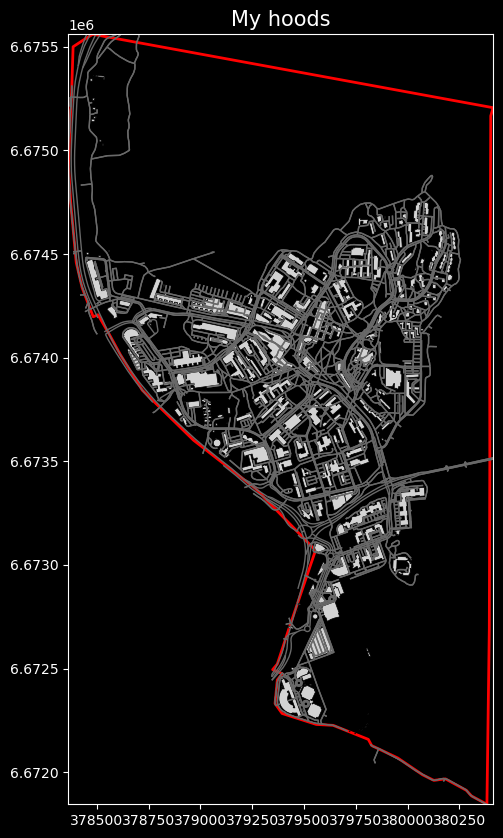

In [12]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import matplotlib.pyplot as plt
import geopandas as gpd

# Ensure all layers are in the same CRS (EPSG:3067, for example)
if selected_buildings.crs != "EPSG:3067":
    selected_buildings = selected_buildings.to_crs("EPSG:3067")
if selected_roads.crs != "EPSG:3067":
    selected_roads = selected_roads.to_crs("EPSG:3067")
if admin_boundary.crs != "EPSG:3067":
    admin_boundary = admin_boundary.to_crs("EPSG:3067")

# Set a dark background if desired
plt.style.use("dark_background")

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the administrative boundary in red with no fill
admin_boundary.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=2)

# Plot buildings in gray
selected_buildings.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5)

# Plot roads in darker gray
selected_roads.plot(ax=ax, color="dimgray", linewidth=1)

# Set plot limits to the bounding box of the administrative boundary
minx, miny, maxx, maxy = admin_boundary.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Add a title
ax.set_title("My hoods", fontsize=15)

# Show the plot
plt.show()

## Problem 3 - Geocoding addresses (Total 3 points)

In this problem, the overall idea is to geocode addresses of two different datasets (rescue stations and swimming halls) and then create a simple map that shows the locations of these facilities in Helsinki. 

### Read first
 
To understand the basics of geocoding, you should first read the following chapter from the [Introduction to Python for Geographic Data Analysis](https://pythongis.org) -online book that provides key information to solve this problem:

- [Chapter 6.5, Geocoding](https://pythongis.org/part2/chapter-06/nb/04-geocoding.html)


### Task 3.1 (1/3 points)

- Read addresses of **rescue stations** stored in the `data/helsinki_rescue_stations_addresses.xlsx` using the `.read_excel()` function of `pandas`,
- Geocode the addresses as points using the `geocode()` function of `geopandas`:
   - You should use `"nominatim"` as the `provider`, `"introsda"` as `user_agent`, and 10 seconds `timeout`
- Join the information from the rescue stations into the geocoded addresses and the rescue stations using the `.join()` method

As a result you should have a table that looks something like below (the first 2 rows):
![](img/geocoded_rescue_stations.png)


Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
import geopandas as gpd
from geopandas.tools import geocode
import pandas as pd
import contextily as ctx
import osmnx as ox

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 3.2 (1/3 points)

- Read addresses of **swimming halls** stored in the `data/helsinki_swimming_hall_addresses.xlsx` using the `read_excel()` function of `pandas`,
- geocode the addresses as points using the `geocode()` function of `geopandas`:
   - You should use `"nominatim"` as the `provider`, `"introsda"` as `user_agent`, and 10 seconds `timeout`  
- Join the information from the rescue stations into the geocoded addresses and the rescue stations using the `.join()` method

As a result you should have a table that looks something like below (the first 2 rows):
![](img/geocoded_swimming_halls.png)


Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 3.3 (1/3 points)

- Visualize the two layers in a single map where the swimming halls are presented with blue points, and rescue stations are presented with red points.
- Add a basemap using the `.add_basemap()` function of the `contextily` library:
  - Use the `CartoDB.positron` as the basemap data provider
  - Use the CRS of the rescue stations as the `crs` for the basemap

As a result, you should get a map that looks something like below:

![Map](img/geocoded_addresses_map.png)


Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

## Problem 4 - Create a routable network for routing (6 points)

In this problem, the overall idea is to prepare a routable graph for the city of Helsinki that we can later use to conduct a shortest path analysis between different locations. 

### Read first
 
To understand the basics of network analysis in Python, you should first read the [Tutorial 2 from the course website](https://introsda.readthedocs.io/en/latest/tutorials/spatial_network_analysis.html) that includes all the required information to solve this problem.

### Task 4.1 (2/6 points)

- Fetch drivable roads as a graph for Helsinki Region using the `.graph_from_place()` function of `osmnx` library
- Extract the nodes and edges of the graph by using the `graph_to_gdfs()` function of the `osmnx`
- Plot the nodes and edges in a single map

As a result, you should get a map that looks something like below:

![](img/nodes_and_edges_helsinki.png)

 
Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
import osmnx as ox

# Place name
query = "Helsinki, Finland"

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 4.2 (2/6 points)

- Fill speed limit information (`maxspeed`) for roads which lacks this information following the same logic as presented in the [Tutorial 2 of the course](https://introsda.readthedocs.io/en/latest/tutorials/spatial_network_analysis.html)
- Visualize the speed limit information and create a simple map

As a result, you should get a map that looks something like following:

![](img/speed_limits_helsinki.png)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 4.3 (1/6 points)

- Calculate drive time in seconds for each edge based on the `length` and `maxspeed` columns and store the result in a column `travel_time_seconds`. Use the following formula:
  - `length / maxspeed / 3.6`

As a result, the first rows in the `edges` should look something like this, i.e you should have a column with travel times in seconds as the last column in the GeoDataFrame:

![](img/travel_times_edges.png)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Questions (1/6 point)

Based on the road network edges, answer to following questions. Use `pandas` functionalities to find out the answers to these questions:

- **Question 4.1** What is the mean length of all distances?
- **Question 4.2** What is the mean travel time (in seconds) of all roads?

### Answers

- **Answer 4.1**:
- **Answer 4.2**:

*Hint: To "activate" this cell in Editing mode, double click this cell. If you want to get this cell back in the "Reading-mode", press Shift+Enter.*

## Problem 5 - Network analysis with Python (4 points)

In this problem, the overall idea is to use the routable graph created in Problem 4 and conduct a shortest path analysis between one rescue station and one swimming hall. 

### Read first
 
To understand the basics of network analysis in Python, you should first read the [Tutorial 2 from the course website](https://introsda.readthedocs.io/en/latest/tutorials/spatial_network_analysis.html) that includes all the required information to solve this problem.

### Task 5.1 (1/4 points)

- Create a routable graph based on the `nodes` and `edges` using the `ox.graph_from_gdfs()` function of `osmnx`
- Pick the first row from the i) rescue stations and ii) swimming halls and store them into variables called `station` and `swimming_hall`
- Extract the `x` and `y` coordinates of these locations that we use as origin and destination location in the routing:
  - Store the x/y coordinates of the `station` into variables `orig_x` and `orig_y`
  - Store the x/y coordinates of the `swimming_hall` into variables `dest_x` and `dest_y`

As a result, your X and Y coordinates for the origin and destination should look something like following:

```
Origin (x,y): 24.95073768352675, 60.1847604
Destination (x,y): 25.141683772881358, 60.2088021
```

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 5.2 (1/4 points)

- Find the nearest network node for the origin and destination using `ox.distance.nearest_nodes()` function:
  - Store the nearest node for origin and destination into variables `origing_node_id` and `destination_node_id` accordingly
 
As a result, you should get something like following:

```
Origin node-id: 3120542773.
Destination node-id: 507744848.

```

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 5.3 (2/4 points)

- Calculate the shortest path **route** between the `origin_node_id` and the `destination_node_id` by using the `nx.dijkstra_path()` function of the `networkx` library:
  - Use the `travel_time_seconds` as `weight` parameter
  - Store the result into variable `route`

- Calculate the total travel time of the shortest path between the `origin_node_id` and the `destination_node_id` by using the `nx.dijkstra_path_length()` function:
  - Use the `travel_time_seconds` as `weight` parameter
  - Store the result into variable `travel_time`

- Make a map out of the results by using the `ox.plot_graph_route()` function of the `osmnx` library

As a result, you should get a map that looks something like following:

![](img/shortest_path_to_vuosaari.png)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

## Problem 6 (optional) - Shortest paths between multiple locations

**Note:** This is an optional problem for those who want to challenge themselves more. This does not influence the grading if you cannot complete the task.


### Task 6.1 

- Iterate over all rescue stations and all swimming halls and calculate the travel times and the routes between them
- Store the details about the routings into a `pandas` `DataFrame` that should contain following information:

![](img/shortest_paths_all_table.png)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 6.2 

- Plot all the shortest routes by using the `ox.plot_graph_routes()` function

As a result, you should get something like following:

![](img/all_shortest_paths.png)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Task 6.3

- Use `pandas` functionalities to group the observations based on destinations (i.e. swimming halls), and
- find out which rescue station is the closest to each swimming hall

As a result, you should get a table that looks something like following:

![](img/shortest_path_to_closest_table.png)

If you plot the routes on a map, you should get something like following:

![](img/shortest_path_to_closest.png)

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

### Problem 6.4 

- What is the **mean** travel time between closest rescue station and swimming hall?
- What is the **maximum** travel time between closest rescue station and swimming hall?

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

## Problem 7 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise? *__Hint:__ To "activate" this cell in Editing mode, double click this cell. If you want to get this cell back in the "Reading-mode", press Shift+Enter.*


I spent approximately this many hours: **X hours**

In addition, if you would like to give any feedback about the exercise (optional), please provide it below:

**My feedback:**